# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [1]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [2]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return np.square(X.dot(w) - y).mean()
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return np.transpose(X).dot(X.dot(w) - y) * 2 / y.shape[0]
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [5]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    w_list = [w.copy()]
    for i in range(n_iterations):
        w -= lr * loss.calc_grad(X, y, w)
        w_list.append(w.copy())
    w_list = np.array(w_list)
    return w_list

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [6]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [7]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [8]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8)

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

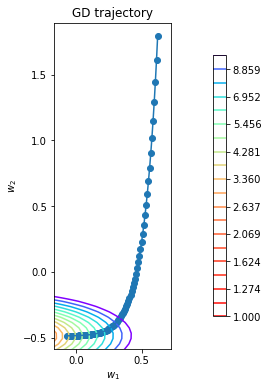

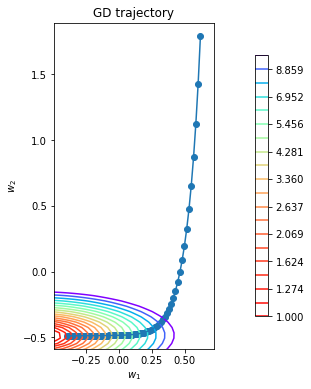

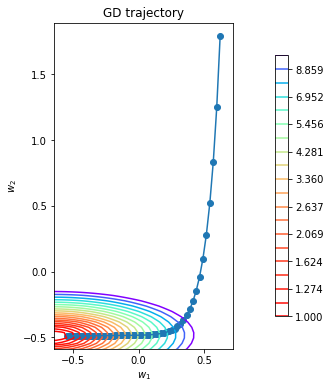

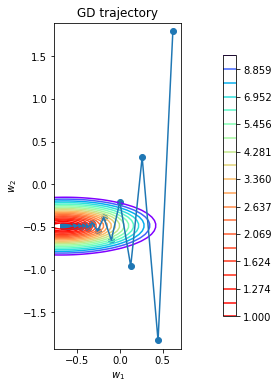

In [9]:
lr = [0.0005, 0.001, 0.0015, 0.01]
for i in lr:
    plot_gd(gradient_descent(w_init, X, y, loss, i, 100), X, y, loss)

### Вывод: 
Чем меньше шаг, тем более плавная траектория, поэтому мы меньше "перескакиваем" через какие-то точки. Так больше вероятность, что мы не пропустим искомый минимум, но при этом можем не дойти до минимума, если будем идти слишком медленно

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [10]:
def calc_grad_on_batch(X, Y, w, batch_size):
    sample = np.random.randint(n_objects, size=batch_size)
    return 2 * np.dot(X[sample].T, np.dot(X[sample], w) - Y[sample]) / batch_size

def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    w_list = [w.copy()]

    for i in range(num_steps):
        w -= lr * calc_grad_on_batch(X, y, w, batch_size)
        w_list.append(w.copy())
    w_list = np.array(w_list)
    return w_list

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

lr = 0.0005 batch_size = 1


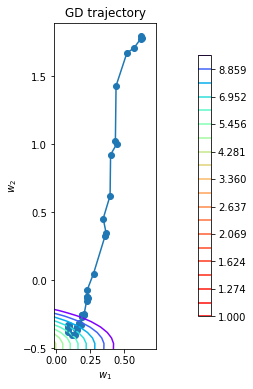

lr = 0.0005 batch_size = 10


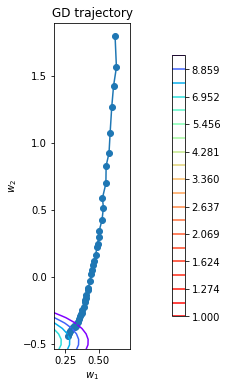

lr = 0.0005 batch_size = 50


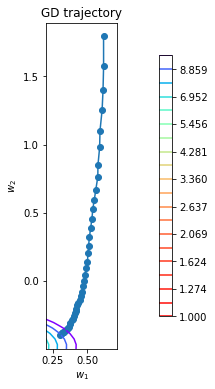

lr = 0.0005 batch_size = 150


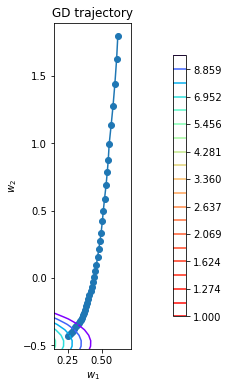

lr = 0.001 batch_size = 1


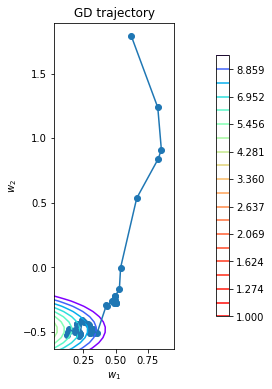

lr = 0.001 batch_size = 10


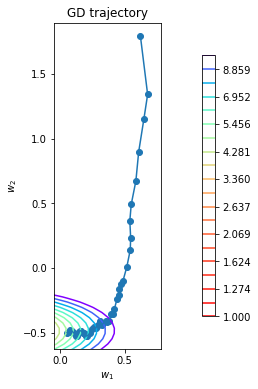

lr = 0.001 batch_size = 50


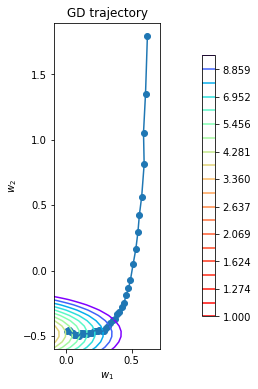

lr = 0.001 batch_size = 150


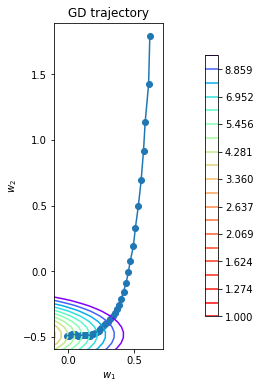

lr = 0.0015 batch_size = 1


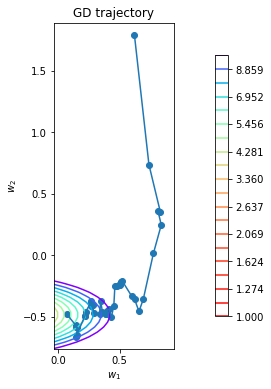

lr = 0.0015 batch_size = 10


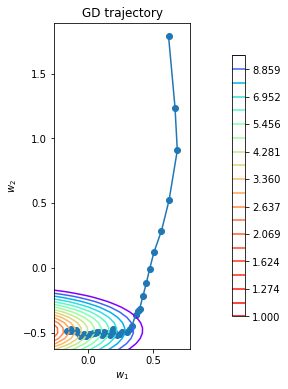

lr = 0.0015 batch_size = 50


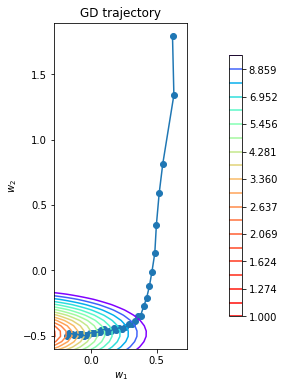

lr = 0.0015 batch_size = 150


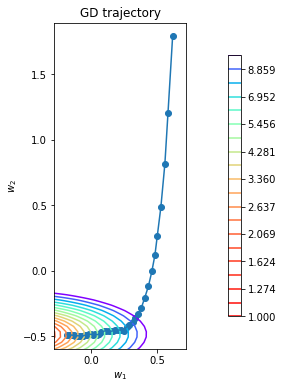

lr = 0.01 batch_size = 1


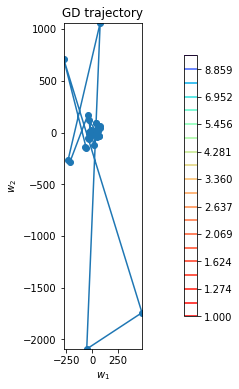

lr = 0.01 batch_size = 10


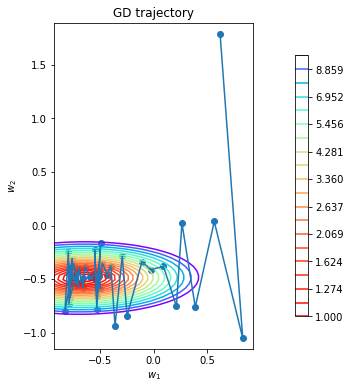

lr = 0.01 batch_size = 50


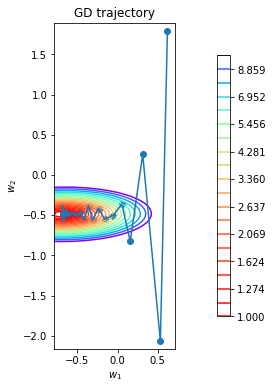

lr = 0.01 batch_size = 150


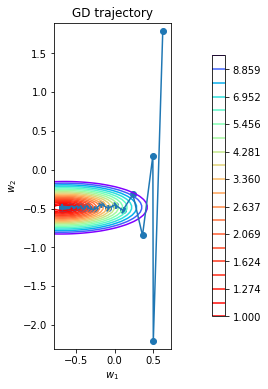

In [11]:
batch = [1, 10, 50, 150]
for l in lr:
    for b in batch:
        print("lr =",l,"batch_size =",b)
        plot_gd(stochastic_gradient_descent(w_init, X, y, loss, l, b), X, y, loss)

### Вывод
Чем больше batch-size, тем на большее количество объектов мы ориентируемся, поэтому спуск получается более последовательным (при подходящем lr, он все еще влияет на быстроту переходов) и имеет меньше "скачков" из-за рандомности перехода. На примере lr = 0.01, batch_size = 1 мы видим, что при таком коэффициенте и ориентированности всего лишь на один объект, мы идем абсолютно непредсказуемо

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [12]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    w_list = [w.copy()]

    for i in range(num_steps):
        step_size = lr * np.power(1 / (1 + i), p)
        w -= step_size * calc_grad_on_batch(X, y, w, batch_size)
        w_list.append(w.copy())
    w_list = np.array(w_list)
    return w_list

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

p = 0.1


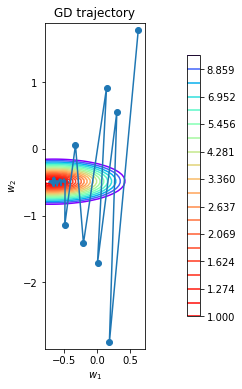

p = 0.3


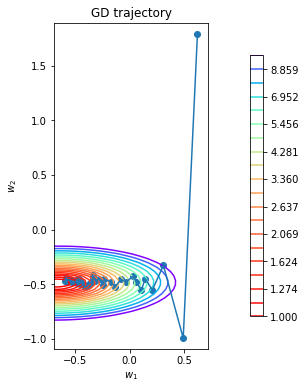

p = 0.6


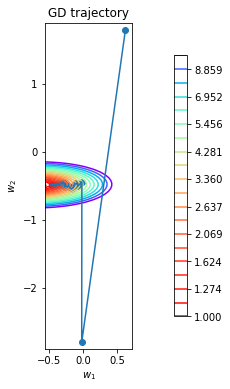

p = 1


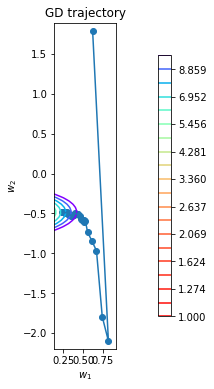

In [13]:
p_values = [0.1, 0.3, 0.6, 1]
for p in p_values:
    print("p =",p)
    plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p), X, y, loss)

### Вывод
Так как p влияет на размер шага на каждой итерации, от него зависит траектория, поэтому так как чем больше p, тем меньше шаг, и из-за этого, например, первый шаг при последнем случае выходит очень большим, однако из-за его переменности мы все равно доходим в нужную точку

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

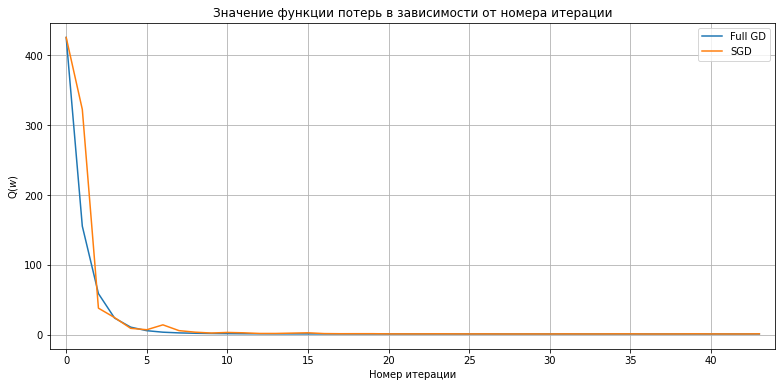

In [14]:
sgd = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.1, 100)
gd = gradient_descent(w_init, X, y, loss, 0.01, 100)

gd_loss = []
sgd_loss = []

for i in range(len(sgd)):
    gd_loss.append(loss.calc_loss(X, y, gd[i]))
    sgd_loss.append(loss.calc_loss(X, y, sgd[i]))
    

plt.figure(figsize=(13, 6))
plt.plot(range(num_steps+1), gd_loss, label='Full GD')
plt.plot(range(num_steps+1), sgd_loss, label='SGD')

plt.title('Значение функции потерь в зависимости от номера итерации')
plt.xlim((-1, num_steps+1))
plt.legend()
plt.xlabel('Номер итерации')
plt.ylabel(r'Q($w$)')
plt.grid()
plt.show()

### Вывод
Нельзя сказать об однозначном преимуществе, так как SGD зависит от рандома, однаков в данном случае мы видим, что в определенный момент он достигает меньшего значения быстрее по сравнению с обычным GD. 

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [15]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        w_init = np.zeros(X.shape[1])
        w_list = gradient_descent(w_init, X, y, self.loss, self.lr)
        self.w = w_list[-1]
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return X.dot(self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [16]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [17]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"]
)
X_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [18]:
X_raw = X_raw[~X_raw[25].isna()].reset_index()
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)
# Уберем индексы
X_raw = X_raw.drop('index', axis=1)
X_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [19]:
# Разделим вещественные и категориальные признаки
cat_features_mask = (X_raw.dtypes == "object").values 
X_real = X_raw[X_raw.columns[~cat_features_mask]]
X_cat = X_raw[X_raw.columns[cat_features_mask]]

# Заполним пропуски для категориальных
X_cat = X_cat.fillna("")
# И закодируем
X_cat = pd.get_dummies(X_cat, drop_first=True)

X_cat.head()

,2_audi,2_bmw,2_chevrolet,2_dodge,2_honda,2_isuzu,2_jaguar,2_mazda,2_mercedes-benz,2_mercury,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
X_raw = pd.concat([X_real, X_cat], axis=1)
X_raw.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3, random_state=10)

# Снова выделим категориальные  и вещественные (было видно по размерностям, что на категориальные ушли 50 столбцов)
X_train_real = X_train.iloc[:,:-50]
X_test_real = X_test.iloc[:,:-50]
X_train_cat = X_train.iloc[:,-50:]
X_test_cat = X_test.iloc[:,-50:]

X_train_real.head()

,0,1,9,10,11,12,13,16,18,19,20,21,22,23,24
110,0,NaN,114.2,198.9,68.4,56.7,3285,120,3.46,2.19,8.4,95.0,5000.0,19,24
95,2,168.0,95.1,162.4,63.8,53.3,2008,97,3.15,3.29,9.4,69.0,5200.0,31,37
168,2,134.0,98.4,176.2,65.6,53.0,2975,146,3.62,3.50,9.3,116.0,4800.0,24,30
193,-1,74.0,104.3,188.8,67.2,57.5,3042,141,3.78,3.15,9.5,114.0,5400.0,24,28
68,-1,NaN,115.6,202.6,71.7,56.5,3740,234,3.46,3.10,8.3,155.0,4750.0,16,18


In [21]:
X_test_real.head()

,0,1,9,10,11,12,13,16,18,19,20,21,22,23,24
59,0,115.0,98.8,177.8,66.5,55.5,2410,122,3.39,3.39,8.60,84.0,4800.0,26,32
5,2,NaN,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,110.0,5500.0,19,25
20,1,118.0,93.7,157.3,63.8,50.8,1876,90,2.97,3.23,9.41,68.0,5500.0,37,41
127,2,NaN,96.1,176.8,66.6,50.5,2460,132,3.46,3.90,8.70,NaN,NaN,23,31
52,3,150.0,95.3,169.0,65.7,49.6,2380,70,NaN,NaN,9.40,101.0,6000.0,17,23


In [22]:
X_train_cat.head()

,2_audi,2_bmw,2_chevrolet,2_dodge,2_honda,2_isuzu,2_jaguar,2_mazda,2_mercedes-benz,2_mercury,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
68,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
X_test_cat.head()

,2_audi,2_bmw,2_chevrolet,2_dodge,2_honda,2_isuzu,2_jaguar,2_mazda,2_mercedes-benz,2_mercury,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
59,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
52,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [24]:
# Заполним пропуски в вещественных данных
from sklearn.impute import SimpleImputer
mis_replacer = SimpleImputer(strategy="mean")
X_train_real = pd.DataFrame(data=mis_replacer.fit_transform(X_train_real), columns=X_train_real.columns)
X_test_real = pd.DataFrame(data=mis_replacer.fit_transform(X_test_real), columns=X_test_real.columns)

X_train_real.head()

,0,1,9,10,11,12,13,16,18,19,20,21,22,23,24
0,0.0,121.895652,114.2,198.9,68.4,56.7,3285.0,120.0,3.46,2.19,8.4,95.0,5000.0,19.0,24.0
1,2.0,168.000000,95.1,162.4,63.8,53.3,2008.0,97.0,3.15,3.29,9.4,69.0,5200.0,31.0,37.0
2,2.0,134.000000,98.4,176.2,65.6,53.0,2975.0,146.0,3.62,3.50,9.3,116.0,4800.0,24.0,30.0
3,-1.0,74.000000,104.3,188.8,67.2,57.5,3042.0,141.0,3.78,3.15,9.5,114.0,5400.0,24.0,28.0
4,-1.0,121.895652,115.6,202.6,71.7,56.5,3740.0,234.0,3.46,3.10,8.3,155.0,4750.0,16.0,18.0


In [25]:
X_test_real.head()

,0,1,9,10,11,12,13,16,18,19,20,21,22,23,24
0,0.0,115.000000,98.8,177.8,66.5,55.5,2410.0,122.0,3.390000,3.390000,8.60,84.00,4800.000000,26.0,32.0
1,2.0,122.244898,99.8,177.3,66.3,53.1,2507.0,136.0,3.190000,3.400000,8.50,110.00,5500.000000,19.0,25.0
2,1.0,118.000000,93.7,157.3,63.8,50.8,1876.0,90.0,2.970000,3.230000,9.41,68.00,5500.000000,37.0,41.0
3,2.0,122.244898,96.1,176.8,66.6,50.5,2460.0,132.0,3.460000,3.900000,8.70,104.35,5066.666667,23.0,31.0
4,3.0,150.000000,95.3,169.0,65.7,49.6,2380.0,70.0,3.326441,3.270508,9.40,101.00,6000.000000,17.0,23.0


In [26]:
# И отмасштабируем их
from sklearn import preprocessing
normalizer = preprocessing.StandardScaler()
X_train_real = pd.DataFrame(data=normalizer.fit_transform(X_train_real))
X_test_real = pd.DataFrame(data=normalizer.fit_transform(X_test_real))

X_train_real.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.685099,0.000000,2.460126,1.939677,1.190313,1.192503,1.397865,-0.152991,0.467058,-3.105841,-0.421145,-0.225795,-0.288490,-0.977136,-0.995194
1,0.913466,1.521725,-0.616758,-0.954011,-0.975115,-0.279189,-1.051635,-0.738063,-0.668857,0.113900,-0.154127,-0.960951,0.124913,0.914095,0.927580
2,0.913466,0.399517,-0.085149,0.140041,-0.127774,-0.409044,0.803233,0.508395,1.053337,0.728578,-0.180828,0.367985,-0.701892,-0.189123,-0.107760
3,-1.484382,-1.580849,0.865302,1.138958,0.625419,1.538783,0.931750,0.381205,1.639615,-0.295885,-0.127425,0.311434,0.538316,-0.189123,-0.403571
4,-1.484382,0.000000,2.685657,2.233010,2.743773,1.105933,2.270631,2.746932,0.467058,-0.442237,-0.447846,1.470719,-0.805243,-1.449943,-1.882627


In [27]:
X_test_real.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.641524,-0.204934,0.053828,0.359364,0.281057,0.801003,-0.286605,-0.149282,0.249964,4.904499e-01,-0.444287,-4.927348e-01,-0.583778,0.132703,0.204870
1,0.955740,0.000000,0.230360,0.315887,0.182526,-0.096218,-0.093983,0.155710,-0.536590,5.314947e-01,-0.466573,1.368035e-01,0.948640,-0.936429,-0.812333
2,0.157108,-0.120074,-0.846487,-1.423202,-1.049119,-0.956055,-1.347018,-0.846405,-1.401801,-1.662660e-01,-0.263774,-8.801429e-01,0.948640,1.812767,1.512702
3,0.955740,0.000000,-0.422809,0.272410,0.330323,-1.068208,-0.187316,0.068570,0.525259,2.583732e+00,-0.422002,-3.440876e-16,0.000000,-0.325497,0.059555
4,1.754372,0.785099,-0.564035,-0.405835,-0.113069,-1.404665,-0.346179,-1.282108,0.000000,-1.822753e-15,-0.266002,-8.111358e-02,2.043224,-1.241895,-1.102963


In [28]:
X_train_cat.head()

,2_audi,2_bmw,2_chevrolet,2_dodge,2_honda,2_isuzu,2_jaguar,2_mazda,2_mercedes-benz,2_mercury,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
68,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
X_test_cat.head()

,2_audi,2_bmw,2_chevrolet,2_dodge,2_honda,2_isuzu,2_jaguar,2_mazda,2_mercedes-benz,2_mercury,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
59,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
52,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [30]:
X_train_real.reset_index(drop=True, inplace=True)
X_train_cat.reset_index(drop=True, inplace=True)
X_test_real.reset_index(drop=True, inplace=True)
X_test_cat.reset_index(drop=True, inplace=True)

X_train = pd.concat([X_train_real, X_train_cat], axis=1)
X_test = pd.concat([X_test_real, X_test_cat], axis=1)

X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,-0.685099,0.000000,2.460126,1.939677,1.190313,1.192503,1.397865,-0.152991,0.467058,-3.105841,...,0,0,0,0,0,0,0,1,0,0
1,0.913466,1.521725,-0.616758,-0.954011,-0.975115,-0.279189,-1.051635,-0.738063,-0.668857,0.113900,...,0,0,0,1,0,0,0,0,0,0
2,0.913466,0.399517,-0.085149,0.140041,-0.127774,-0.409044,0.803233,0.508395,1.053337,0.728578,...,0,0,0,0,0,0,0,1,0,0
3,-1.484382,-1.580849,0.865302,1.138958,0.625419,1.538783,0.931750,0.381205,1.639615,-0.295885,...,0,0,0,0,0,0,0,1,0,0
4,-1.484382,0.000000,2.685657,2.233010,2.743773,1.105933,2.270631,2.746932,0.467058,-0.442237,...,0,0,0,0,0,0,0,1,0,0


In [31]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,-0.641524,-0.204934,0.053828,0.359364,0.281057,0.801003,-0.286605,-0.149282,0.249964,4.904499e-01,...,0,0,0,1,0,0,0,0,0,0
1,0.955740,0.000000,0.230360,0.315887,0.182526,-0.096218,-0.093983,0.155710,-0.536590,5.314947e-01,...,0,0,0,0,0,0,0,1,0,0
2,0.157108,-0.120074,-0.846487,-1.423202,-1.049119,-0.956055,-1.347018,-0.846405,-1.401801,-1.662660e-01,...,0,0,0,1,0,0,0,0,0,0
3,0.955740,0.000000,-0.422809,0.272410,0.330323,-1.068208,-0.187316,0.068570,0.525259,2.583732e+00,...,0,0,0,0,0,0,0,1,0,0
4,1.754372,0.785099,-0.564035,-0.405835,-0.113069,-1.404665,-0.346179,-1.282108,0.000000,-1.822753e-15,...,0,0,1,0,1,0,0,0,0,0


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [32]:
linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [33]:
from sklearn.metrics import mean_squared_error

print ("Train: {}".format(mean_squared_error(y_train, linear_regression.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, linear_regression.predict(X_test))))

Train: 2004043.4361450868
Test: 6187091.75162422


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [34]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        return np.square(X.dot(w) - y).mean() + self.coef * np.linalg.norm(w[:-1])**2
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        left = np.transpose(X).dot(X.dot(w) - y) * 2 / y.shape[0] 
        w[-1] = 0
        right = 2 * self.coef * w
        return left + right
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [35]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [36]:
coefs = [0.001, 0.005, 0.01, 0.1, 0.2, 0.3, 0.5]

for i in coefs:
    linear_regression = LinearRegression(MSEL2Loss(i))
    linear_regression.fit(X_train, y_train)
    print("COEF:", i)
    print ("Train: {}".format(mean_squared_error(y_train, linear_regression.predict(X_train))))
    print ("Test: {}".format(mean_squared_error(y_test, linear_regression.predict(X_test))))

COEF: 0.001
Train: 2154099.8967381613
Test: 7483571.294224359
COEF: 0.005
Train: 2723697.656413667
Test: 7972073.282430166
COEF: 0.01
Train: 3226036.8292191927
Test: 8362355.910722106
COEF: 0.1
Train: 6473587.418193809
Test: 8746527.393567195
COEF: 0.2
Train: 8890964.04933999
Test: 8763106.28761929
COEF: 0.3
Train: 11131260.508446185
Test: 9234796.467569686
COEF: 0.5
Train: 15343758.996623944
Test: 10982201.152586568


### Вывод:
При маленьких коэффициентах мы все еще не избавляемся от переобучения, однако при 0.1-0.2 получаем приемлемую MSE, так как при бОльших значениях ошибка на обоих наборах данных начинает расти

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [37]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        loss = 0.0
        for i in range(X.shape[0]):
            z = X[i].dot(w) - y[i]
            loss += z**2/2 if z < abs(self.eps) else self.eps*(abs(z) - self.eps / 2)
        return loss / y.shape[0]
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        grad = np.zeros(X.shape[1])
        for i in range(X.shape[0]):
            z = X[i].dot(w) - y[i]
            grad += X[i] * (z if z < abs(self.eps) else self.eps*np.sign(z))
        return grad / y.shape[0]
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [48]:
linear_regression = LinearRegression(HuberLoss(100))
linear_regression.fit(X_train, y_train)
print ("Train: {}".format(mean_squared_error(y_train, linear_regression.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, linear_regression.predict(X_test))))

Train: 7150878.693956218
Test: 12845645.791595805


### Вывод: 
Мы избавляемся от переобучения, однако при маленьких коэффициентах ошибка будет слишком большой (несколько десятков миллионов), при бОльших уже становится лучше

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
# 💀💀💀
Image(url="https://sun9-1.userapi.com/impg/YBeBvuEFBAQp8nLJWKXcuRgyUzzsnmpuUVCfjQ/dgosNKtbNw8.jpg?size=750x594&quality=96&sign=c362a9113b9a323e65a12b071326414f&type=album")

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [40]:
def simulated_annealing(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, step_size: float = 0.05, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    w_list = [w.copy()]
    
    for i in range(n_iterations):
        new_w = w + np.random.standard_t(3, size=w.shape)
        new_mse = loss.calc_loss(X, y, new_w)
        mse = loss.calc_loss(X, y, w)
       
        p = 1 if new_mse - mse < 0 else np.exp(-float(new_mse - mse)/(0.5**(float(i/100))))
        w = new_w if np.random.rand() <= p else w
        
        w_list.append(w)
        
    w_list = np.array(w_list)
    return w_list

class LinearRegressionAnnealing:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss

    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        w_init = np.zeros(X.shape[1])
        w_list = simulated_annealing(w_init, X, y, self.loss)
        self.w = w_list[-1]
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return X.dot(self.w)

In [43]:
linear_regression_annealing = LinearRegressionAnnealing(MSEL2Loss(0.01))
linear_regression_annealing.fit(X_train, y_train)
print ("Train: {}".format(mean_squared_error(y_train, linear_regression_annealing.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, linear_regression_annealing.predict(X_test))))

Train: 2933702.4772963934
Test: 6060918.260350025


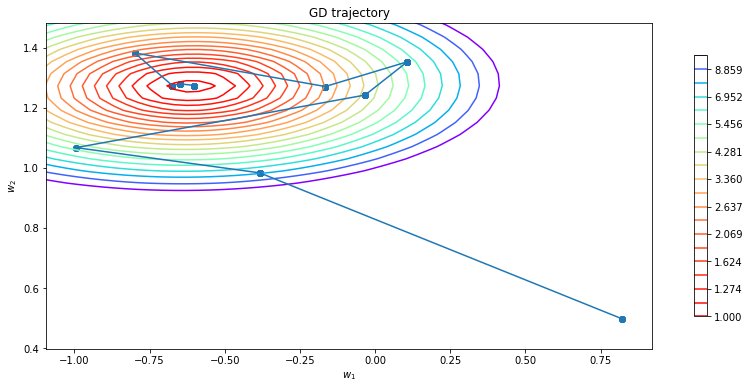

In [42]:
# Создадим объект лосса
loss = MSELoss()

n_features = 2
n_objects = 300

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))


plot_gd(simulated_annealing(w_init, X, y, loss), X, y, loss)